In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [24]:
x = Symbol('x')
f1 = 5*exp(-10*x**3)
x1 = 0.25
x2 = 0.65
xt = (x1+x2)/2
a = 4/((xt-x1)*(xt-x2))

f2_est = a*(x-x1)*(x-x2)s

f2 = -100*x**2+90*x-16.25
f2 = f2.expand()
f = f1-f2
f_dot = f.diff()

In [33]:
f_dot

-150*x**2*exp(-10*x**3) + 200*x - 90

In [26]:
def NewtonRaphson(p0, tol, f, der_f, No):
    i=1
    salida="No lo logre"
    while i<No:
        p = p0 - ((f(p0))/(der_f(p0)))
        if abs(p-p0) < tol:
            #print("Lo logre. La raíz esta: ", p)
            salida = (p,i)
            break
        i = i+1
        p0 = p
    return salida

In [27]:
f1_np = lambdify(x, f1, "numpy")
f2_np = lambdify(x, f2, "numpy")
f_np = lambdify(x, f, "numpy")
f_dot_np = lambdify(x, f_dot, "numpy")

In [28]:
L1, i1 = NewtonRaphson(0.2, 1e-5, f_np, f_dot_np, 1000)
L2, i2 = NewtonRaphson(0.8, 1e-5, f_np, f_dot_np, 1000)

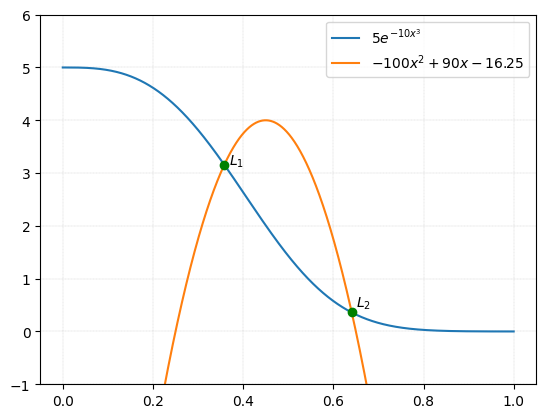

In [32]:
t = np.arange(0,1,0.0001)
fig, ax = plt.subplots()
ax.scatter([L1, L2], [f1_np(L1), f2_np(L2)], color="g", zorder=10)
ax.plot(t, f1_np(t), label=r'$5 e^{- 10 x^{3}}$')
ax.plot(t, f2_np(t), label=r'$- 100 x^{2} + 90 x - 16.25$')
ax.set_ylim([-1, 6])
ax.grid(linestyle = '--', linewidth = 0.2)
ax.text(L1+0.01, f1_np(L1), r'$L_1$')
ax.text(L2+0.01, f2_np(L2)+0.1, r'$L_2$')
ax.legend()